<a href="https://colab.research.google.com/github/Nannanpeng/Econ_Dynamic_Programming/blob/master/finite_MC_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade quantecon

Requirement already up-to-date: quantecon in /usr/local/lib/python3.6/dist-packages (0.4.7)


In [2]:
import random
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

In [3]:
def mc_path(P, init_state=None, sample_size=100000):
  states = np.arange(len(P))
  
  if init_state is not None:
    init_state = random.choices(states, weights=init_state)[0]
  else:
    init_state = 0
  state_path = [init_state]
  for _ in range(sample_size):
    new_state = random.choices(states, weights=P[int(init_state), :])[0]
    init_state = new_state
    state_path.append(init_state)
  return np.array(state_path)

In [4]:
P = np.array([[0.4, 0.6],
        [0.2, 0.8]])

In [5]:
X = mc_path(P, init_state=[0.1, 0.9], sample_size=100_000)
np.mean(X == 0)

0.25157748422515774

In [6]:
from quantecon import MarkovChain

mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=1_000_000)
np.mean(X == 0)

0.249859

In [7]:
%time mc_path(P, sample_size=1_000_000) 

CPU times: user 3.81 s, sys: 21.7 ms, total: 3.83 s
Wall time: 3.84 s


array([0, 0, 0, ..., 1, 1, 1])

In [8]:
%time mc.simulate(ts_length=1_000_0000)

CPU times: user 312 ms, sys: 64 ms, total: 376 ms
Wall time: 387 ms


array([0, 0, 0, ..., 1, 1, 1])

## Exercise 1

In [9]:
alpha, beta = 0.7, 0.2

p_unemployed = beta/(alpha + beta)

P = np.array([[1-alpha, alpha],
        [beta, 1-beta]])

n = 3000

In [10]:
mc = qe.MarkovChain(P)
path = mc.simulate(ts_length = n)

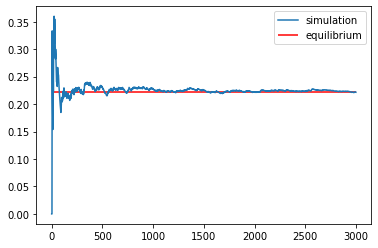

In [11]:
den = np.ones(n).cumsum()
num = (path==0).cumsum()
plt.plot(np.arange(n), num/den, label='simulation')
plt.hlines(p_unemployed, 0, n, colors='r', label='equilibrium');
plt.legend();

## Exercise 2

In [12]:
%%file web_graph_data.txt
a -> d;
a -> f;
b -> j;
b -> k;
b -> m;
c -> c;
c -> g;
c -> j;
c -> m;
d -> f;
d -> h;
d -> k;
e -> d;
e -> h;
e -> l;
f -> a;
f -> b;
f -> j;
f -> l;
g -> b;
g -> j;
h -> d;
h -> g;
h -> l;
h -> m;
i -> g;
i -> h;
i -> n;
j -> e;
j -> i;
j -> k;
k -> n;
l -> m;
m -> g;
n -> c;
n -> j;
n -> m;

Overwriting web_graph_data.txt


In [13]:
import re
f = open("web_graph_data.txt", "r")

links = [re.findall('\w', line) for line in f]
zip_links = list(zip(*links))

nodes = sorted(set(zip_links[0]))
n = len(nodes)

In [14]:
P = np.zeros((n, n))
for link in links:
  begin, end = link
  row = nodes.index(begin)
  col = nodes.index(end)
  P[row, col] = 1

P /= P.sum(axis=1).reshape(-1, 1)

In [15]:
mc = qe.MarkovChain(P)
psi_star = mc.stationary_distributions[0]

for ranking, name in sorted(zip(psi_star, nodes), reverse=1):
  print(name,": ", round(ranking, 5))

g :  0.16071
j :  0.15936
m :  0.11952
n :  0.10877
k :  0.09106
b :  0.08326
i :  0.05312
e :  0.05312
c :  0.04834
h :  0.0456
l :  0.03202
d :  0.03056
f :  0.01164
a :  0.00291


In [16]:
max_idx = psi_star.argmax()
min_idx = psi_star.argmin()
print('The highest and lowest ranking are: {} and {}, respectively.'.format(nodes[max_idx], nodes[min_idx]))

The highest and lowest ranking are: g and a, respectively.


## Exercise 3

In [17]:
from scipy.stats import norm

def approx_markov(rho, sigma_u, m = 3, n = 7):
  sigma_y = np.sqrt(sigma_u**2/(1 - rho**2))
  states = np.linspace(-m*sigma_y, m*sigma_y, n)
  s = states[1] - states[0]
  P = np.zeros((n, n))
  for i in range(n):
    for j in range(n):
      if j == 0:
        v = states[0] - rho*states[i] + s/2
        P[i, j] = norm.cdf(v, 0, sigma_u)
      elif j == n-1:
        v = states[n-1] - rho*states[i] - s/2
        P[i, j] = 1 - norm.cdf(v, 0, sigma_u)
      else:
        v_1 = states[j] - rho*states[i] + s/2
        v_2 = states[j] - rho*states[i] - s/2
        P[i, j] = norm.cdf(v_1, 0, sigma_u) - norm.cdf(v_2, 0, sigma_u)
  return states, P

In [18]:
states, P = approx_markov(0.8, 0.6)

In [19]:
states, P

(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 array([[4.33816167e-01, 4.99376631e-01, 6.60362165e-02, 7.70313456e-04,
         6.71288296e-07, 4.01598754e-11, 1.11022302e-16],
        [6.68072013e-02, 4.99376631e-01, 4.00439660e-01, 3.31438785e-02,
         2.32509926e-04, 1.19148705e-07, 4.14823731e-12],
        [2.30326613e-03, 1.19369238e-01, 5.69789957e-01, 2.93407399e-01,
         1.50669308e-02, 6.31902423e-05, 1.89895625e-08],
        [1.54542969e-05, 6.19421103e-03, 1.96118716e-01, 5.95343238e-01,
         1.96118716e-01, 6.19421103e-03, 1.54542969e-05],
        [1.89895625e-08, 6.31902423e-05, 1.50669308e-02, 2.93407399e-01,
         5.69789957e-01, 1.19369238e-01, 2.30326613e-03],
        [4.14819366e-12, 1.19148705e-07, 2.32509926e-04, 3.31438785e-02,
         4.00439660e-01, 4.99376631e-01, 6.68072013e-02],
        [1.58513652e-16, 4.01598473e-11, 6.71288296e-07, 7.70313456e-04,
         6.60362165e-02, 4.99376631e-01, 4.33816167e-01]]))

In [20]:
(P>=0).sum() == 7*7, P.sum(axis=1) 

(True, array([1., 1., 1., 1., 1., 1., 1.]))